1.

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

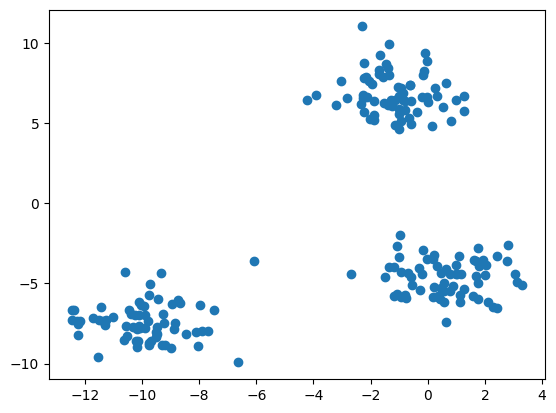

In [29]:
X, y = make_blobs(n_samples=200, random_state=100, n_features=2, centers = 3, cluster_std = 1.2)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

[array([-1.06511532,  6.46394556]), array([-9.86511532, -7.73605444]), array([ 0.53488468, -4.93605444])]


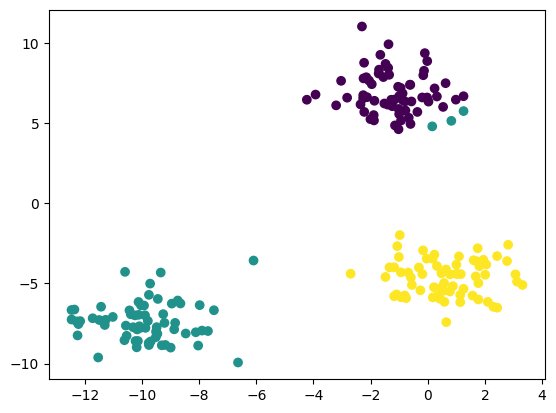

In [34]:
def funkcja_gorska(x, c, sigma = 1.0, b = 1.0, wartosc = 0.0):  
    for i in x:
        vec_diff = c - i
        wartosc += np.exp(-(math.hypot(vec_diff[0], vec_diff[1])**(2*b))/(2*sigma**2))
  
    return wartosc


x_min,x_max,y_min,y_max = min(X[:,0]), max(X[:,0]), min(X[:,1]), max(X[:,1])
x_points, y_points = np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2)


def daj_mi_wszystkie_wierzcholki(Xs,no_centers,  x_points, y_points, b = 1.0, sigma = 1.0):
    wszystkie_centra = [] 
    while len(wszystkie_centra) < no_centers:
        najwyzsza_gora = 0
        for y in y_points:
            for x in x_points:
                punkt = np.array([x, y])
                ile_centr = len(wszystkie_centra)
                wartosc_funkcji_gorskiej = funkcja_gorska(Xs, punkt)     
                if ile_centr == 0:
                    wartosc_funkcji_gorskiej = wartosc_funkcji_gorskiej
                elif ile_centr == 1:
                    roznica = punkt - wszystkie_centra[0]
                    wartosc_funkcji_gorskiej -= funkcja_gorska(Xs, wszystkie_centra[0]) * np.exp(-(math.hypot(roznica[0], roznica[1])**(2*b))/(2*sigma**2))
                else:
                    roznica_1 = wszystkie_centra[1] - wszystkie_centra[0]
                    roznica_2 = punkt - wszystkie_centra[1]
                    roznica = punkt - wszystkie_centra[0]
                    wartosc_funkcji_gorskiej -= (funkcja_gorska(Xs, wszystkie_centra[0]) * np.exp(-(math.hypot(roznica[0], roznica[1])**(2*b))/(2*sigma**2))) + (funkcja_gorska(Xs, wszystkie_centra[1]) * np.exp(-(math.hypot(roznica_2[0], roznica_2[1])**(2*b))/(2*sigma**2)))          
                if wartosc_funkcji_gorskiej > najwyzsza_gora:
                    najwyzsza_gora = wartosc_funkcji_gorskiej
                    koordynaty = np.array([x, y])
        wszystkie_centra.append(koordynaty)
    return wszystkie_centra

wszystkie_centra = daj_mi_wszystkie_wierzcholki(X, 3, x_points, y_points)
print(wszystkie_centra)


grupa = []
b, sigma = 1, 1

for punkt in X:
    najblizsze_centrum = 0
    wartosc = 0
    for i in range(3):
        wartosc_funkcji_gestosci = np.exp(-(math.hypot((punkt - wszystkie_centra[i])[0]) - (punkt - wszystkie_centra[i])[1])**(2*b))/(2*sigma**2)
        if wartosc_funkcji_gestosci > wartosc:
            wartosc = wartosc_funkcji_gestosci
            najblizsze_centrum = i
   
    grupa.append(najblizsze_centrum)
plt.scatter(X[:,0], X[:,1], c=grupa)
plt.show()

Pierwotnie zapomniałem o zajęciach - to moje pierwsze podejście ;)

In [ ]:
def matrix_of_density(data):
    x_min,x_max,y_min,y_max = int(min(data[:,0])), int(max(data[:,0]))+1, int(min(data[:,1])), int(max(data[:,1]))+1
    print(x_min, x_max, y_min, y_max)
    print([np.abs(y_min) + np.abs(y_max), np.abs(x_min) + np.abs(x_max)])
    arr = np.zeros([np.abs(y_min) + np.abs(y_max), np.abs(x_min) + np.abs(x_max)])
    print(np.shape(arr))
    print(x_min, y_min)
    for i,j in data:
        arr[int(int(j) + np.abs(y_min))][int(int(i) + np.abs(x_min))] += 1
    return arr
plt.rcParams["figure.figsize"] = (15,10)
c = matrix_of_density(X)

2. 

In [82]:
n = 10000
x = np.random.uniform(-6, 6, n)
y = np.random.uniform(-6, 6, n)

x1 = []
y1 = []
for i in range(n):
    if ((x[i]-5)**2)/0.3**2+((y[i]-0)**2)/4**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-3)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-0)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]+3)**2)/1**2 <=1:
        x1.append(x[i])
        y1.append(y[i])
X = np.array([[x,y] for (x,y) in zip(x1,y1)])
